
# Diploma in Artificial Intelligence

# AI Programming (April 2021), Session 8

# Topic: Machine Learning Workflow

## Libraries needed in machine learning

In [1]:
# Think what libraries are needed in your machine learning workflow:

# Numpy and Pandas:
import numpy as np
import pandas as pd

# scikit-learn library functionality:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Library implementation of support vector machines:
from sklearn.svm import SVR

# plotting with matplotlib:
import matplotlib.pyplot as plt

## Read Data

In [2]:
# Read the data from a text file, data base or with the help of a library:

# California housing data set from scikit-learn library:
(california_x, california_y) = datasets.fetch_california_housing(return_X_y=True)


## Pre-processing

In [3]:
# Pre-processing, for instance, normalizing data, selecting variables from a table, etc.



## Create the model 

In [4]:
# Create the model (or the model object), training later

# You may create more than one model, if you want to compare models, for instance,
# compare linear prediction and non-linear prediction

svr_rbf_malli = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)


## Model training and cross-validation

In [5]:
# Decide which cross-validation methodology you will use, for instance k-fold
# cross-validation

# Number of folds:
k_fold = 5

mse_train = np.zeros(k_fold)
mse_test = np.zeros(k_fold)

r2_train = np.zeros(k_fold)
r2_test = np.zeros(k_fold)

# Loop structure, for every data and for every model:
for i in range(k_fold):
    # divide the data into training data and validation data
    data_x_train, data_x_test, data_y_train, data_y_test = \
        train_test_split(california_x, california_y, test_size=0.3, random_state=67*i)
    
    # train the model with training data
    svr_rbf_malli.fit(data_x_train, data_y_train)
    
    # assess the model, measure the error for training data => training error
    y_pred_rbf_train = svr_rbf_malli.predict(data_x_train)
    mse_train[i] = mean_squared_error(data_y_train, y_pred_rbf_train)
    r2_train[i] = r2_score(data_y_train, y_pred_rbf_train)
    
    # assess the model, measure the error for validation data => validation error
    y_pred_rbf_test = svr_rbf_malli.predict(data_x_test)
    mse_test[i] = mean_squared_error(data_y_test, y_pred_rbf_test)
    r2_test[i] = r2_score(data_y_test, y_pred_rbf_test)
    
    # store these errors so that you can report on the average error, for instance


In [6]:
# Compute the average error and the standard deviation of the error

print("Averga training error (MSE) on {0}".format(np.mean(mse_train)))

print("Average test error (MSE) on {0}".format(np.mean(mse_test)))

print("Average coefficient of determintaion for the training set (R2) on {0}".format(np.mean(r2_train)))

print("Average coefficient of determintaion for the test set (R2) on {0}".format(np.mean(r2_test)))


Averga training error (MSE) on 0.009506925534929675
Average test error (MSE) on 1.1318052393740559
Average coefficient of determintaion for the training set (R2) on 0.9928646252192408
Average coefficient of determintaion for the test set (R2) on 0.1486912967324933


## Present the results graphically

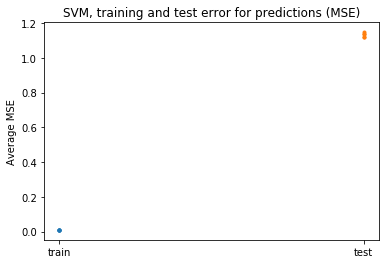

In [7]:
# For every model and every error measure

# Tee tuloskuva, jossa opetusvirheet ja validointivirheet on visualisoitu:
plt.plot(np.ones((k_fold,1)), mse_train, '.')
plt.plot(2*np.ones((k_fold,1)), mse_test, '.')
plt.title('SVM, training and test error for predictions (MSE)')
plt.xticks([1,2], ['train', 'test'])
plt.ylabel('Average MSE')
plt.show()

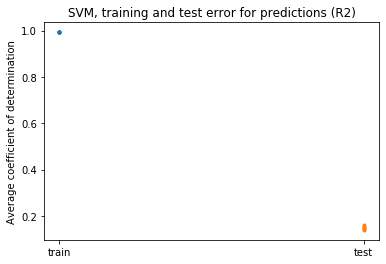

In [8]:
# Tee tuloskuva, jossa opetusvirheet ja validointivirheet on visualisoitu:
plt.plot(np.ones((k_fold,1)), r2_train, '.')
plt.plot(2*np.ones((k_fold,1)), r2_test, '.')
plt.title('SVM, training and test error for predictions (R2)')
plt.xticks([1,2], ['train', 'test'])
plt.ylabel('Average coefficient of determination')
plt.show()

In [9]:
# Now we are done!
